In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator    # for data agmuntation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import glob
import matplotlib.pyplot as plt

In [3]:
# Define paths for training and validation
train_dir = r"C:\Users\avina\Downloads\Plant_Disease_Dataset\New Plant Diseases Dataset(Augmented)\train"
valid_dir = r"C:\Users\avina\Downloads\Plant_Disease_Dataset\New Plant Diseases Dataset(Augmented)\valid"
test_dir = r"C:\Users\avina\Downloads\Plant_Disease_Dataset\New Plant Diseases Dataset(Augmented)\test"
# Image size and batch size
image_size = (128, 128)
batch_size = 32

# Data generators
train_datagen = ImageDataGenerator(rescale=1.0/255)
valid_datagen = ImageDataGenerator(rescale=1.0/255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

valid_data = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 18504 images belonging to 10 classes.
Found 4626 images belonging to 10 classes.


In [19]:
# Define test directory
# test_dir = r"C:\XPrathmesh\College Stuff\DeepLearning\test\test"

# Get all test image paths
test_image_paths = glob.glob(test_dir + "/*.JPG")

# Preprocess test images
# Preprocess test images
test_images = []
for img_path in test_image_paths:
    img = load_img(img_path, target_size=image_size)  # ✅ Resize to (128, 128)
    img_array = img_to_array(img) / 255.0              # ✅ Normalize
    test_images.append(img_array)

test_images = np.array(test_images)  # Final shape: (n, 128, 128, 3)



In [21]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_data.class_indices), activation='softmax')  # Number of classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,393,610 (28.20 MB)

 Trainable params: 7,393,610 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

# Add EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=2,
    callbacks=[early_stopping]
)



Epoch 1/2
579/579 ━━━━━━━━━━━━━━━━━━━━ 365s 628ms/step - accuracy: 0.5753 - loss: 1.2363 - val_accuracy: 0.8990 - val_loss: 0.3093
Epoch 2/2
579/579 ━━━━━━━━━━━━━━━━━━━━ 259s 447ms/step - accuracy: 0.8471 - loss: 0.4397 - val_accuracy: 0.9416 - val_loss: 0.1915


In [11]:
model.save('plant_disease_model.h5')



In [25]:
# Evaluate on validation data
val_loss, val_acc = model.evaluate(valid_data)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")



145/145 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - accuracy: 0.9403 - loss: 0.1935
Validation Loss: 0.1915
Validation Accuracy: 0.9416


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


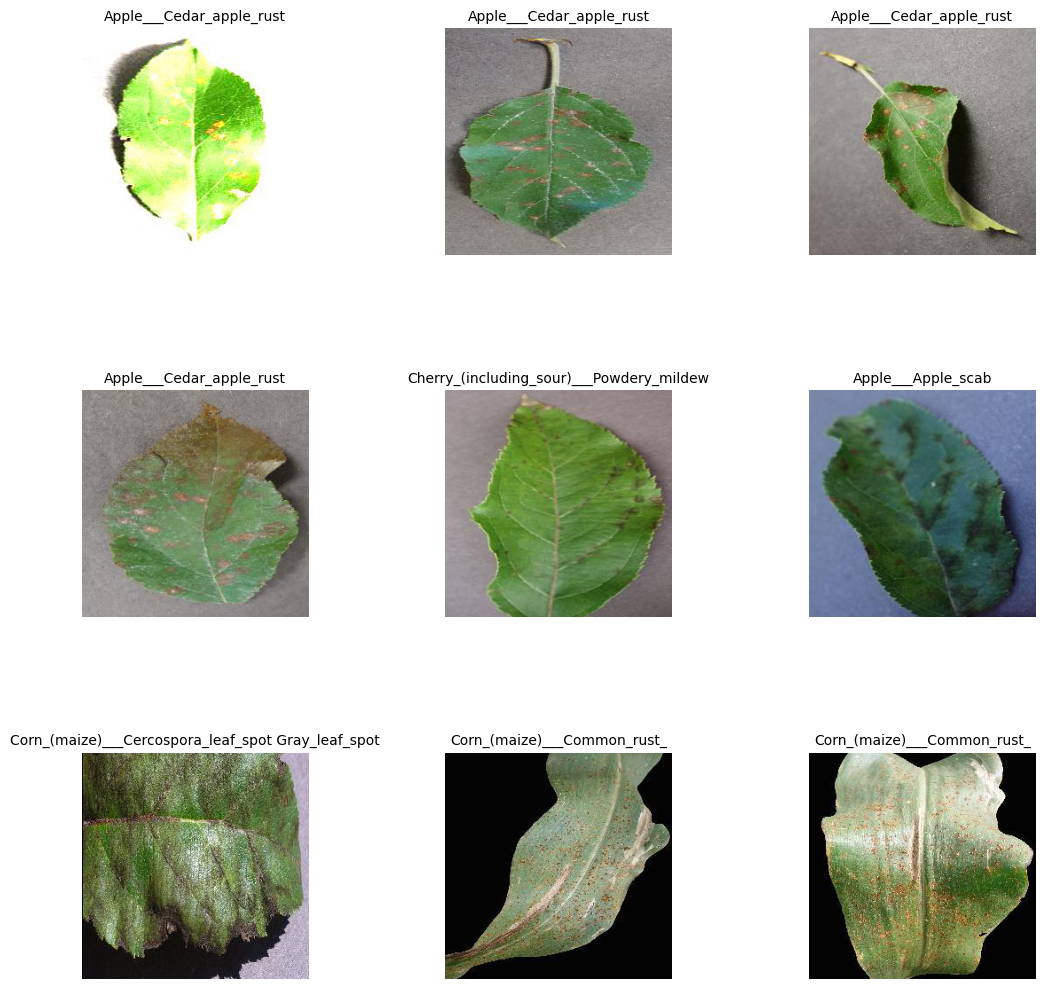

In [46]:
# Predict on test images
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Map predictions to class labels
class_labels = list(train_data.class_indices.keys())
predicted_labels = [class_labels[k] for k in predicted_classes]

# Display some test results
plt.figure(figsize=(10, 10))  # Larger canvas for better spacing

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(plt.imread(test_image_paths[i]))
    plt.title(predicted_labels[i], fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.subplots_adjust(hspace=0.6, wspace=0.5)  # Only call once, **after** the loop
plt.show()


In [10]:
# Save the model
model.save("plant_disease_model.h5")

In [ ]:

# import numpy as np
# import matplotlib.pyplot as plt
# from tensorflow.keras.preprocessing.image import load_img, img_to_array

# # Ensure test_images is a list of image paths
# if isinstance(test_images, list):  
#     test_images_array = np.array([
#         img_to_array(l0oad_img(img_path, target_size=(img_height, img_width))) for img_path in test_images
#     ])
#     test_images_array = test_images_array / 255.0  # Normalize pixel values
# else:
#     test_images_array = test_images  # Use as-is if already a NumPy array

# # Ensure correct shape for model prediction
# if len(test_images_array.shape) == 3:  
#     test_images_array = np.expand_dims(test_images_array, axis=0)

# # Predict on test images
# predictions = model.predict(test_images_array)
# predicted_classes = np.argmax(predictions, axis=1)

# # Map predictions to class labels
# class_labels = list(train_data.class_indices.keys())

# # Ensure class mapping is within range
# predicted_labels = [class_labels[k] if k < len(class_labels) else "Unknown" for k in predicted_classes]

# # Display some test results
# plt.figure(figsize=(9, 9))
# for i in range(min(9, len(test_images))):
#     plt.subplot(3, 3, i + 1)
#     plt.imshow(plt.imread(test_images[i]))
#     plt.title(predicted_labels[i])
#     plt.axis('off')

# plt.show()
